In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import itertools

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

from scipy import stats
from code.python.mpmath_integration import quad_phi
from mpmath import mp

from scipy import stats

In [198]:
x = mp.mpf('3')
alpha = mp.mpf('5')
beta = mp.mpf('1/2')
mu = mp.mpf('1')
delta = mp.mpf('4')


xmu = x - mu
gamma = mp.sqrt(alpha ** 2 - beta ** 2)
omega = mp.sqrt(xmu ** 2 + delta ** 2)

In [199]:
mp_result = quad_phi(x, alpha, beta, mu, delta, digits=100)
mp_result

mpf('0.9599775405494657360087526092654300842676567924404618741762742877734998432533542621944042950278597682396')

In [200]:
mp.dps = 100

In [201]:
cache = {}

def Ik(k):
    mp.dps = 100
    
    s = 0
    for j in range(2*k + 1 + 1):
        m = k + 1 - j
        if abs(m) not in cache:
            bm = mp.besselk(m, alpha * omega)
            cache[m] = bm
        else:
            bm = cache[abs(m)]
            
        s += mp.binomial(2*k + 1, j) * (-1) ** (-j) * (omega * beta / alpha / xmu) ** (j) * bm

    return 2 * s

In [202]:
cache

{}

In [219]:
# %%time
mp.dps = 100

C = delta * mp.exp(delta * gamma + xmu * beta) / (mp.mpf('2') * mp.pi)

N = 29
s = mp.zero

z = xmu ** 2 * alpha / omega

for k in range(N):
    r = z ** k / mp.fac2(2*k + 1)
    # q = mp.quad(lambda t: (t - xmu / beta)**(2*k + 1) * t**(-k - 2) * mp.exp(-omega ** 2 / 2 / t - alpha ** 2 / 2 * t), [0, mp.inf])
    q = Ik(k)
    t = r * q
    s += t
    # print(k, float(r), float(q), float(t))

r1 = mp.mpf('1/2') + C * s * xmu * alpha / omega

In [220]:
r1

mpf('0.9599775405494656988052623462048041638584566120922334985947574660375242454672520877236004746538070125003')

In [221]:
mp_result

mpf('0.9599775405494657360087526092654300842676567924404618741762742877734998432533542621944042950278597682396')

In [222]:
float(abs(r1 / mp_result - 1))

3.875454236332064e-17

Series with Remainder and integral

In [8]:
mp.dps = 100

C = delta * mp.exp(delta * gamma + xmu * beta) / (2 * mp.pi)

s = 0

z = xmu ** 2 * alpha / omega

for k in range(N):
    r = (-beta) ** (2*k+1) / mp.fac2(2*k + 1)
    q = mp.quad(lambda t: (t - xmu / beta)**(2*k + 1) * t**(-k - 2) * mp.exp(-omega ** 2 / 2 / t - alpha ** 2 / 2 * t), [0, mp.inf])
    t = r * q
    s += t
    print(k, float(r), float(q), float(t))

float(s)

0 -0.5 0.549306938084578 -0.274653469042289
1 -0.041666666666666664 0.8719153560883859 -0.03632980650368275
2 -0.0020833333333333333 2.502932494143947 -0.005214442696133224
3 -7.440476190476191e-05 11.209318542270632 -0.0008340266772522792
4 -2.066798941798942e-06 70.53037058750995 -0.00014577209529495277
5 -4.697270322270322e-08 578.635482847883 -2.7180072809939193e-05
6 -9.033212158212158e-10 5877.460375240571 -5.309234652103332e-06
7 -1.5055353597020263e-11 71287.0317002564 -1.0732514691293527e-06
8 -2.2140225877970977e-13 1005810.5437217837 -2.2268872628445092e-07
9 -2.913187615522497e-15 16188433.840322757 -4.7159944978333545e-08
10 -3.468080494669639e-17 292749234.1149627 -1.0152779086635778e-08
11 -3.769652711597434e-19 5876964239.308184 -2.2154114180669244e-09
12 -3.7696527115974335e-21 129692590002.32802 -4.888960235763701e-10
13 -3.490419177405031e-23 3120670733017.2 -1.0892448972889852e-10
14 -3.008982049487096e-25 81315622265233.36 -2.4467724773896043e-11
15 -2.426598427005

-0.3172113624199036

In [9]:
remainder = 0
for k in range(N, N + 50):
    r = (-beta) ** (2*k+1) / mp.fac2(2*k + 1)
    q = mp.quad(lambda t: (t - xmu / beta)**(2*k + 1) * t**(-k - 2) * mp.exp(-omega ** 2 / 2 / t - alpha ** 2 / 2 * t), [0, mp.inf])
    t = r * q
    remainder += t
    # print(k, float(r), float(q), float(t))

float(remainder)

-1.0534631748549187e-33

In [10]:
def fremainder(t):
    t1 = t **(-3/2) * mp.exp(-delta**2 / 2 / t - gamma ** 2 / 2 * t - beta * xmu)
    t2 = mp.gammainc(N + 1/2 , 0, (beta * t - xmu) ** 2 / 2 / t, regularized=True)
    return t1 * t2


def fremainder_simple(t):
    t1 = t **(-3/2) * mp.exp(-delta**2 / 2 / t - gamma ** 2 / 2 * t - beta * xmu)
    a = N + 1/2
    z = (beta * t - xmu) ** 2 / 2 / t
    t2 = (1 - mp.exp(-z)) ** a
    return t1 * t2


def fremainder_bound(t):
    t1 = t **(-3/2) * mp.exp(-omega**2 / 2 / t - alpha ** 2 / 2 * t)
    t2 = ((beta * t - xmu) / mp.sqrt(t)) ** (2*N + 1) * 2* t / (2*t*(N - 1/2) - (beta * t - xmu) ** 2)
    return t1 * t2


def fremainder_bound2(t):
    t1 = t **(-3/2) * mp.exp(-omega**2 / 2 / t - alpha ** 2 / 2 * t)
    t2 = ((beta * t - xmu) / mp.sqrt(t)) ** (2*N + 1) * 1 / (2*N - 1 - beta**2 * t)
    return t1 * t2


def fremainder_approx(t):
    t1 = t **(-3/2) * mp.exp(-delta**2 / 2 / t - gamma ** 2 / 2 * t - beta * xmu)
    z = (beta * t - xmu) ** 2 / 2 / t
    a = N + 1/2
    t2 = z ** a* mp.exp(-z) / a / mp.gamma(N + 1/2)
    return t1 * t2


def fremainder_approx2(t):
    t1 = t **(-3/2) * mp.exp(-delta**2 / 2 / t - gamma ** 2 / 2 * t - (beta * t - xmu) ** 2 / 2 / t)
    t2 = ((beta * t - xmu) / mp.sqrt(t))**(2*N + 1) / mp.gamma(N + 1/2)
    return t1 * t2 * mp.exp(- beta * xmu)

In [11]:
float(mp.quad(fremainder, [0, mp.inf]))

8.405420025911127e-34

In [12]:
float(mp.quad(fremainder_simple, [0, mp.inf]))

7.770008997188536e-07

In [13]:
float(mp.quad(fremainder_bound, [0, mp.inf]))

5.948571029095737e+45

In [14]:
float(mp.quad(fremainder_bound, [0, mp.inf]))

5.948571029095737e+45

In [15]:
float(mp.quad(fremainder_approx, [0, mp.inf]))

6.3646103026191235e-34

In [16]:
float(mp.quad(fremainder_approx2, [0, mp.inf]))

5.1177371514749755e-17

In [17]:
remainder = (-1) ** (2*N + 1) * 2 ** (N - 1/2) * (2*N + 1) * mp.gamma(N + 1/2) / mp.fac2(2*N + 1) * mp.quad(fremainder, [0, mp.inf])
float(remainder)

-1.0534631748549235e-33

Bound

In [18]:
bound = (-1) ** (2*N + 1) * (2*N + 1) / 2/ mp.fac2(2*N + 1) * mp.quad(fremainder_bound, [0, mp.inf])
float(bound)

-1.0913238763578087e-33

In [19]:
simple = (-1) ** (2*N + 1) * (2*N + 1) * mp.gamma(N + 1/2) / mp.fac2(2*N + 1) * mp.quad(fremainder_simple, [0, mp.inf])
float(simple)

-1.2231977536314289e-21

In [20]:
bound2 = (-1) ** (2*N + 1) * (2*N + 1) / mp.fac2(2*N + 1) * mp.quad(fremainder_bound2, [0, mp.inf])
float(bound2)

-1.0928061979121543e-33

In [21]:
t = 200
1 / (2*N - 1 - beta**2 * t), (2*N - 1) ** (-1) *(1 + t), (2*N - 1) ** (-1) / (1 - beta**2 / (2*N - 1) * t)

(mpf('0.02040816326530612244897959183673469387755102040816326530612244897959183673469387755102040816326530612253'),
 2.0303030303030303,
 mpf('0.02040816326530612067885359594203357713068930470213598134566326530612244897959183673469387755102040816322'))

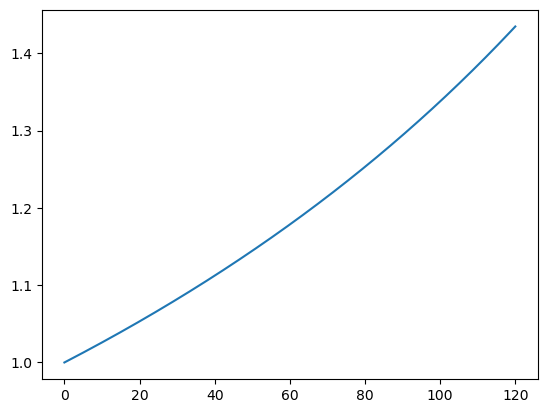

In [22]:
tt = np.linspace(0, 120, 1000)

ff = 1 / (1 - beta**2/(2*N - 1) * tt)
ff2 = (1 + tt)

plt.plot(tt, ff)
# plt.plot(tt, ff2)
plt.show()

Approximation 1

In [23]:
def fremainder_approx(t):
    t1 = t **(-3/2) * mp.exp(-delta**2 / 2 / t - gamma ** 2 / 2 * t - beta * xmu)
    z = (beta * t - xmu) ** 2 / 2 / t
    a = N + 1/2
    t2 = z ** a* mp.exp(-z) / a / mp.gamma(N + 1/2)
    return t1 * t2

In [24]:
remainder = (-1) ** (2*N + 1) * 2 ** (N - 1/2) * (2*N + 1) * mp.gamma(N + 1/2) / mp.fac2(2*N + 1) * mp.quad(fremainder_approx, [0, mp.inf])
float(remainder)

-7.976856070776433e-34

Approximation 2

In [25]:
def fremainder_approx2(t):
    t1 = t **(-3/2) * mp.exp(-delta**2 / 2 / t - gamma ** 2 / 2 * t - (beta * t - xmu) ** 2 / 2 / t)
    t2 = ((beta * t - xmu) / mp.sqrt(t))**(2*N + 1)
    return t1 * t2 * mp.exp(- beta * xmu) 

In [26]:
 mp.quad(fremainder_approx2, [0, mp.inf])

mpf('219574614435691466898307563490780933612696180335.4459632870495870687129959528489036791130882685177286051')

In [27]:
remainder_approx2 = (-1) ** (2*N + 1) / mp.fac2(2*N + 1) * mp.quad(fremainder_approx2, [0, mp.inf])
float(remainder_approx2)

-7.976856070776432e-34

Naive

In [28]:
def fremainder_approx_naive(t):
    t1 = t **(-2 - N) * mp.exp(-omega**2 / 2 / t - alpha ** 2 / 2 * t)
    t2 = ((-xmu))**(2*N + 1)
    return t1 * t2

In [29]:
remainder_naive = (-1) ** (2*N + 1) / mp.fac2(2*N + 1) * mp.quad(fremainder_approx_naive, [0, mp.inf])
float(remainder_naive)

1.7047039075776084e-72

In [30]:
mp.quad(fremainder_approx_naive, [0, mp.inf])

mpf('-469244649.6617511818184238063448821621848616286568689419889756810278235816003763313880509347281553867854')

In [31]:
float((-1) ** (2*N + 1) / mp.fac2(2*N + 1) * 2 * ((-xmu))**(2*N + 1) * mp.besselk(N+1 , omega * alpha) * (omega / alpha) **(-N-1))

1.7047039075776084e-72

Approximation 3

In [32]:
def fremainder_approx3(t):
    t1 =  mp.exp(-omega**2 / 2 / t - alpha ** 2 / 2 * t)
    t2 = t**(N -1)
    return t1 * t2

In [33]:
float(mp.quad(fremainder_approx3, [0, mp.inf]))

6.839566151761276e+77

In [34]:
float(beta **(2*N + 1) * (mp.quad(fremainder_approx3, [0, mp.inf])))

2.6977331728986963e+47

In [35]:
beta ** (2*N + 1) * mp.quad(fremainder_approx3, [0, mp.inf])

mpf('269773317289869642126011300668981039671980351929.9050480055806537725539381219483580118663268193468780284')

In [36]:
float(beta ** (2*N + 1) * 2 * mp.besselk(N , omega * alpha) * (omega / alpha) **(N) / mp.fac2(2*N + 1))

9.800508721318737e-34

In [37]:
float(beta ** (2*N + 1) * mp.sqrt(mp.pi * 2/  N) * (mp.exp(1) * alpha ** 2/ 2 / N) ** (-N)  / mp.fac2(2*N + 1))

9.797175819923838e-34